# Análisis electoral del *Frente de Izquierda y los Trabajadores - Unidad*

## MET4OP - T.P n° 2 - Ejercicio 1 - Grupo 2

## 1.1
### Resultados electorales por Circuito Electoral
#### Categoría: Presidente y VIcepresidente

In [17]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
resultCABA = pd.read_csv (                          # Resultados totales
    "datos_agrup.csv"
)

In [19]:
def porcentaje_circuito(result_total, result_agrupacion):
    """
    Función que a partir de tablas con el caro en disputa y una agrupación en específico, 
    calcula el porcentaje por circuito electoral
    """

    # Primero suma la cantidad de votos totales por circuito
    result_total_acotado = result_total[["CODIGO_CIRCUITO", "CODIGO_MESA", "VOTOS_AGRUPACION", "NOMBRE_REGION", "NOMBRE_AGRUPACION"]]

    result_total_circuito = (result_total_acotado.groupby(["NOMBRE_REGION", "CODIGO_CIRCUITO"]).sum())

    result_total_circuito = result_total_circuito.rename(columns={"VOTOS_AGRUPACION": "VOTOS_TOTALES"})


    # Luego suma la cantidad de votos de determinada agrupacion por circuito
    result_agrupacion_acotado = result_agrupacion[["CODIGO_CIRCUITO", "CODIGO_MESA", "VOTOS_AGRUPACION", "NOMBRE_REGION", "NOMBRE_AGRUPACION"]]

    result_agrupacion_circuito = (result_agrupacion_acotado.groupby(["NOMBRE_REGION", "CODIGO_CIRCUITO"]).sum())

    # Luego hace un merge, y calcula el porcentaje diviendo votos de la agrupacion por totales
    porcentaje_circuito = pd.merge(result_total_circuito, result_agrupacion_circuito, on=["NOMBRE_REGION","CODIGO_CIRCUITO"])

    porcentaje_circuito["PORCENTAJE_AGRUPACION"] = ((porcentaje_circuito["VOTOS_AGRUPACION"] / porcentaje_circuito["VOTOS_TOTALES"]) * 100).round(2)


    return porcentaje_circuito

In [20]:
#%%
# Resultados del FIT en cada mesa solo para Presidente
resultCABA_pres_fit = resultCABA[(resultCABA["NOMBRE_CATEGORIA"] == "Presidente y Vicepresidente de la República") & (resultCABA["NOMBRE_AGRUPACION"] == "FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD")]


#%%
# Resultados totales en cada mesa solo para Presidente
resultCABA_pres_total = resultCABA[resultCABA["NOMBRE_CATEGORIA"] == "Presidente y Vicepresidente de la República"]


#### Porcentaje de voto por Circuito

In [21]:
porc_pres_circuito_fit = porcentaje_circuito(resultCABA_pres_total, resultCABA_pres_fit)

In [22]:
porc_pres_circuito_fit

VOTOS_TOTALES  VOTOS_AGRUPACION  \
NOMBRE_REGION CODIGO_CIRCUITO                                    
COMUNA 01     1001000001                7137               343   
              1001000002                6643               335   
              1001000003                3377                31   
              1001000005                5402               176   
              1001000006               11110               148   
...                                      ...               ...   
COMUNA 15     1015000163                9538               444   
              1015000164                8654               455   
              1015000165               15832               700   
              1015000166               13176               588   
              1015000167               10519               456   

                               PORCENTAJE_AGRUPACION  
NOMBRE_REGION CODIGO_CIRCUITO                         
COMUNA 01     1001000001                        4.81  
              1001000002                        5.04  
              1001000003                        0.92  
              1001000005                        3.26  
              1001000006                        1.33  
...                                              ...  
COMUNA 15     1015000163                        4.66  
              1015000164                        5.26  
              1015000165                        4.42  
              1015000166                        4.46  
              1015000167                        4.34  

[166 rows x 3 columns]

#### Los circuitos con valores que superan el cuarto cuantil 

In [23]:
porc_pres_circuito_fit_q75 = porc_pres_circuito_fit.copy()
porc_pres_circuito_fit_q75
porc_pres_circuito_fit_q75["QUANTIL"] = pd.qcut(porc_pres_circuito_fit_q75["PORCENTAJE_AGRUPACION"],q=4, labels= False)

In [24]:
porc_pres_circuito_fit_q75[porc_pres_circuito_fit_q75["QUANTIL"] == 3].sort_values(by=["PORCENTAJE_AGRUPACION"], ascending= False) 

VOTOS_TOTALES  VOTOS_AGRUPACION  \
NOMBRE_REGION CODIGO_CIRCUITO                                    
COMUNA 15     1015000164                8654               455   
              1015000162               12689               658   
COMUNA 05     1005000059               10370               537   
COMUNA 03     1003000036                6242               322   
COMUNA 01     1001000002                6643               335   
COMUNA 05     1005000067               15739               785   
COMUNA 06     1006000072               10797               533   
COMUNA 15     1015000160               17775               874   
COMUNA 03     1003000041               13765               676   
COMUNA 10     1010000109               15192               738   
COMUNA 15     1015000161               15639               759   
COMUNA 10     1010000108                9711               470   
COMUNA 06     1006000073               13841               670   
COMUNA 05     1005000065               10511               508   
COMUNA 01     1001000016                5959               287   
              1001000001                7137               343   
COMUNA 04     1004000044                7296               351   
COMUNA 05     1005000066               10201               490   
              1005000063               15545               741   
COMUNA 15     1015000159                9436               450   
COMUNA 05     1005000058               10885               518   
COMUNA 04     1004000049                9162               434   
              1004000043                9222               436   
COMUNA 05     1005000060               12272               579   
COMUNA 03     1003000035                9320               435   
COMUNA 11     1011000115                9425               440   
COMUNA 15     1015000163                9538               444   
COMUNA 06     1006000068               15756               732   
COMUNA 15     1015000158               15289               710   
COMUNA 04     1004000045                5354               248   
              1004000054               11533               528   
COMUNA 09     1009000092               10706               489   
COMUNA 04     1004000046                4894               223   
COMUNA 01     1001000013                8908               406   
COMUNA 10     1010000111                8598               390   
COMUNA 04     1004000050               11010               498   
COMUNA 11     1011000116               13646               615   
COMUNA 14     1014000156                7567               341   
COMUNA 05     1005000064               16707               754   
              1005000062                8030               362   
COMUNA 09     1009000094                8441               380   
COMUNA 03     1003000033                6477               290   

                               PORCENTAJE_AGRUPACION  QUANTIL  
NOMBRE_REGION CODIGO_CIRCUITO                                  
COMUNA 15     1015000164                        5.26        3  
              1015000162                        5.19        3  
COMUNA 05     1005000059                        5.18        3  
COMUNA 03     1003000036                        5.16        3  
COMUNA 01     1001000002                        5.04        3  
COMUNA 05     1005000067                        4.99        3  
COMUNA 06     1006000072                        4.94        3  
COMUNA 15     1015000160                        4.92        3  
COMUNA 03     1003000041                        4.91        3  
COMUNA 10     1010000109                        4.86        3  
COMUNA 15     1015000161                        4.85        3  
COMUNA 10     1010000108                        4.84        3  
COMUNA 06     1006000073                        4.84        3  
COMUNA 05     1005000065                        4.83        3  
COMUNA 01     1001000016                        4.82        3  
              1001000001              

## Análisis 1.1:
### Estos circuitos con mayor porcentaje son los que se debe priorizar a la hora de focalizar la búsqueda de votos, para acercarse al objetivo de convertirse en tercera fuerza a nivel presidencial
#### Pero vamos a continuar complejizando el análisis

## 1.2
### El mismo procedimiento, pero para comunas

In [25]:
def porcentaje_comuna(porcentaje_circuito):
    """
    Función que en base al porcentaje por circuito
    calcula el porcentaje por comuna
    """
    porcentaje_comuna = (porcentaje_circuito.groupby("NOMBRE_REGION")["VOTOS_TOTALES", "VOTOS_AGRUPACION"].sum())
    porcentaje_comuna["PORCENTAJE_AGRUPACION"] = ((porcentaje_comuna["VOTOS_AGRUPACION"] / porcentaje_comuna["VOTOS_TOTALES"] * 100).round(2))

    return porcentaje_comuna

#### Porcentaje de voto por Comunas

In [26]:
porc_pres_comuna_fit = porcentaje_comuna(porc_pres_circuito_fit)

C:\Users\Usuario\AppData\Local\Temp/ipykernel_1392/3274835435.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  porcentaje_comuna = (porcentaje_circuito.groupby("NOMBRE_REGION")["VOTOS_TOTALES", "VOTOS_AGRUPACION"].sum())


In [27]:
porc_pres_comuna_fit

,VOTOS_TOTALES,VOTOS_AGRUPACION,PORCENTAJE_AGRUPACION
NOMBRE_REGION,,,
COMUNA 01,122034,4368,3.58
COMUNA 02,104294,2620,2.51
COMUNA 03,117157,5124,4.37
COMUNA 04,136899,5798,4.24
COMUNA 05,121975,5740,4.71
COMUNA 06,127594,5248,4.11
COMUNA 07,134121,5247,3.91
COMUNA 08,107120,4018,3.75
COMUNA 09,116632,4568,3.92


#### Gráfico de cantidad de votos presidenciales del partido FIT por comuna 

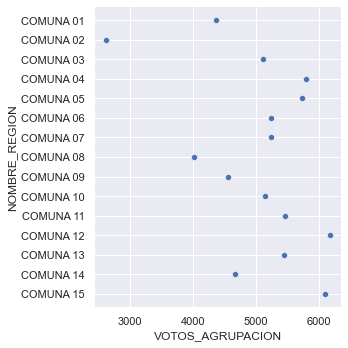

In [28]:
votos_pres_grafico_1 = pd.read_csv("Flor/Graficos/pres_FIT_comuna.csv")
sns.set(style = 'darkgrid')
sns.relplot(x = 'VOTOS_AGRUPACION', y = 'NOMBRE_REGION', data= votos_pres_grafico_1)

#### Gráfico de porcentaje de votos presidenciales del partido FIT por comuna 

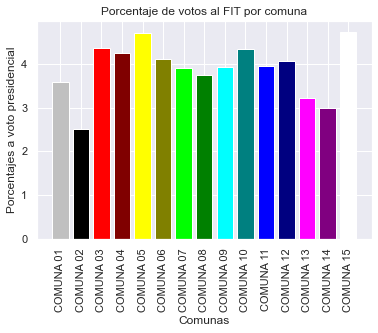

In [30]:
colors = ["#C0C0C0", "#000000", "#FF0000", "#800000", "#FFFF00", "#808000", "#00FF00", "#008000", "#00FFFF", "#008080","#0000FF", "#000080", "#FF00FF", "#800080", "#FFFFFF"]
df =  pd.read_csv('Flor/Graficos/pres_FIT_comuna.csv')
eje_x = df["NOMBRE_REGION"]
eje_y = df["PORCENTAJE_AGRUPACION"]
plt.bar(eje_x, eje_y, color=colors)
plt.xticks(rotation=90)
plt.ylabel('Porcentajes a voto presidencial')
plt.xlabel('Comunas')
plt.title('Porcentaje de votos al FIT por comuna')
plt.show()

#### Comunas que superan el cuarto cuantil

In [ ]:
porc_pres_comuna_fit_q75 = porc_pres_comuna_fit.copy()
porc_pres_comuna_fit_q75
porc_pres_comuna_fit_q75["QUANTIL"] = pd.qcut(porc_pres_comuna_fit_q75["PORCENTAJE_AGRUPACION"],q=4, labels= False)

In [ ]:
porc_pres_comuna_fit_q75[porc_pres_comuna_fit_q75["QUANTIL"] == 3].sort_values(by=["PORCENTAJE_AGRUPACION"], ascending= False) 

,VOTOS_TOTALES,VOTOS_AGRUPACION,PORCENTAJE_AGRUPACION,QUANTIL
NOMBRE_REGION,,,,
COMUNA 15,128547,6094,4.74,3
COMUNA 05,121975,5740,4.71,3
COMUNA 03,117157,5124,4.37,3
COMUNA 10,118733,5148,4.34,3


#### Gráfico de porcentaje de votos presidenciales del partido FIT ordenados de mayor a menor por comuna 

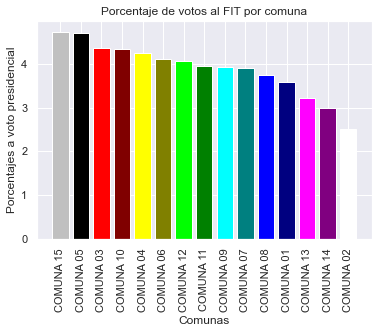

In [32]:
colors = ["#C0C0C0", "#000000", "#FF0000", "#800000", "#FFFF00", "#808000", "#00FF00", "#008000", "#00FFFF", "#008080","#0000FF", "#000080", "#FF00FF", "#800080", "#FFFFFF"]
df =  pd.read_csv('Flor/Graficos/pres_FIT_comuna_sorted.csv')
eje_x = df["NOMBRE_REGION"]
eje_y = df["PORCENTAJE_AGRUPACION"]
plt.bar(eje_x, eje_y, color=colors)
plt.xticks(rotation=90)
plt.ylabel('Porcentajes a voto presidencial')
plt.xlabel('Comunas')
plt.title('Porcentaje de votos al FIT por comuna')
plt.show()

## Análisis 1.2:
### A la hora de plantear una estrategia más general,  las comunas a priorizar son las que superan los 5 puntos: 15, 05, 03, 10, 04, 06, 12. El resto es muy difícil que se pueda subir de ahí 
#### Y con la tabla anterior podemos fijarnos dentro de cada comuna los circuitos a priorizar. Por ejemplo con la Comuna 15:

#### Resultados solo para comuna 15


In [ ]:
# Resultados solo para comuna 15
porc_pres_comuna_15_fit = porc_pres_circuito_fit.loc["COMUNA 15"]

In [ ]:

porc_pres_comuna_15_fit.sort_values(by=["PORCENTAJE_AGRUPACION"], ascending=False)

## 2.1
### Corte de boleta
#### A priori, uno pensaría que hay una mayor cantidad de votos a la categoría Diputados que a la Presidentes para el FIT, significando que hay un porcentaje que corta boleta

In [ ]:
def corte_boleta(porc_pres, porc_dip):
    """
    Resta el voto en categoría Diputado con el Presidencial 
    para cualcular corte de boleta
    """
    porc_pres = porc_pres.rename(columns={"VOTOS_TOTALES": "VOTOS_TOTALES_PRES", "VOTOS_AGRUPACION": "VOTOS_AGRUPACION_PRES", "PORCENTAJE_AGRUPACION": "PORCENTAJE_AGRUPACION_PRES"})
    porc_dip = porc_dip.rename(columns={"VOTOS_TOTALES": "VOTOS_TOTALES_DIP", "VOTOS_AGRUPACION": "VOTOS_AGRUPACION_DIP", "PORCENTAJE_AGRUPACION": "PORCENTAJE_AGRUPACION_DIP"})

    comparacion_pres_dip = pd.merge(porc_pres, porc_dip, left_index=True, right_index=True)

    comparacion_pres_dip["DIFERENCIA_DIP_PRES"] = (comparacion_pres_dip["PORCENTAJE_AGRUPACION_DIP"] - comparacion_pres_dip["PORCENTAJE_AGRUPACION_PRES"])

    return comparacion_pres_dip

In [ ]:
# Resultados totales en cada mesa solo para Diputado Nacional
resultCABA_dip_total = resultCABA[resultCABA["NOMBRE_CATEGORIA"] == "Diputados Nacionales Ciudad Autónoma de Buenos Aires"]

# Resultados del FIT en cada mesa solo para Diputado
resultCABA_dip_fit = resultCABA[(resultCABA["NOMBRE_CATEGORIA"] == "Diputados Nacionales Ciudad Autónoma de Buenos Aires") & (resultCABA["NOMBRE_AGRUPACION"] == "FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD")]


#### Porcentaje de Diputados Nacionales del FIT por circuito


In [ ]:
porc_dip_circ_fit = porcentaje_circuito(resultCABA_dip_total, resultCABA_dip_fit)

In [ ]:
porc_dip_circ_fit

####  Porcentaje de Diputados Nacionales del FIT por comuna

In [ ]:
porc_dip_comuna_fit = porcentaje_comuna(porc_dip_circ_fit)

In [ ]:
porc_dip_comuna_fit

#### Gráfico de cantidad de votos a diputados del partido FIT por comuna 

In [ ]:
votos_dipnac_grafico_1 = pd.read_csv("DipNac_FIT_comuna.csv")
sns.set(style = 'darkgrid')
sns.relplot(x = 'VOTOS_FIT_DIPNAC', y = 'NOMBRE_REGION', data= votos_dipnac_grafico_1)

#### Gráfico de porcentaje de votos a diputados del partido FIT por comuna 

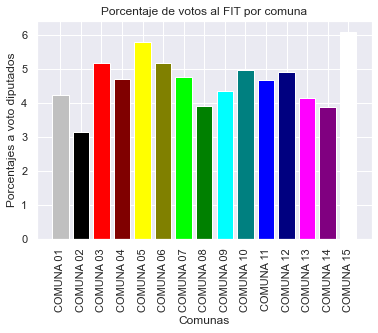

In [33]:
colors = ["#C0C0C0", "#000000", "#FF0000", "#800000", "#FFFF00", "#808000", "#00FF00", "#008000", "#00FFFF", "#008080","#0000FF", "#000080", "#FF00FF", "#800080", "#FFFFFF"]
df =  pd.read_csv('FLor/Graficos/DipNac_FIT_comuna.csv')
eje_x = df["NOMBRE_REGION"]
eje_y = df["PORCENTAJE_FIT_DIPNAC"]
plt.bar(eje_x, eje_y, color=colors)
plt.xticks(rotation=90)
plt.ylabel('Porcentajes a voto diputados')
plt.xlabel('Comunas')
plt.title('Porcentaje de votos al FIT por comuna')
plt.show()

#### Diferencia entre el voto legislativo y el presidencial por circuitos


In [ ]:
diferencia_fit_circ = corte_boleta(porc_pres_circuito_fit, porc_dip_circ_fit)
diferencia_fit_circ

#### Diferencia entre el voto legislativo y el presidencial por comunas. Es decir, el porcentaje de electores por cada comuna que para Presidente votaron cualquier otra cosa, pero para Diputados votaron al FIT


In [ ]:
diferencia_fit_comuna = corte_boleta(porc_pres_comuna_fit, porc_dip_comuna_fit)

In [ ]:

diferencia_fit_comuna[["PORCENTAJE_AGRUPACION_PRES","PORCENTAJE_AGRUPACION_DIP", "DIFERENCIA_DIP_PRES"]].sort_values(by=["DIFERENCIA_DIP_PRES"], ascending = False)


Text(0.5, 8.95999999999998, 'Comunas')

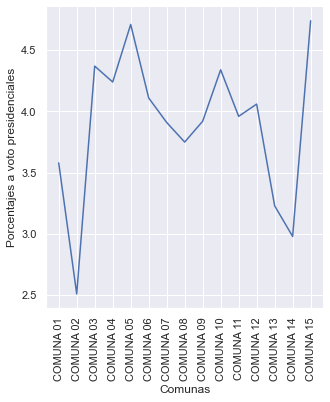

In [35]:
votos_dipnac_grafico_1 = pd.read_csv("Flor/Graficos/pres_FIT_comuna.csv")
sns.relplot(x = 'NOMBRE_REGION', y = "PORCENTAJE_AGRUPACION" , kind = 'line' , data= votos_dipnac_grafico_1  , ci = False)
plt.xticks(rotation=90)
plt.ylabel('Porcentajes a voto presidenciales')
plt.xlabel('Comunas')

Text(0.5, 8.95999999999998, 'Comunas')

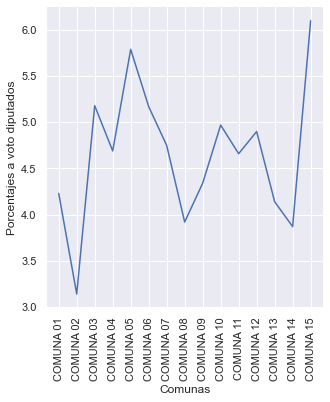

In [36]:
votos_dipnac_grafico_1 = pd.read_csv("Flor/Graficos/DipNac_FIT_comuna.csv")
sns.relplot(x = 'NOMBRE_REGION', y = 'PORCENTAJE_FIT_DIPNAC' , kind = 'line' , data= votos_dipnac_grafico_1  , ci = False)
plt.xticks(rotation=90)
plt.ylabel('Porcentajes a voto diputados')
plt.xlabel('Comunas')

## Análisis 2.1:
### Se puede apreciar en primer lugar que en **todas las comunas la diferencia es positiva**. Es decir, en todas las comunas hay más voto para Diputados que para Presidente
#### Por lo tanto, creemos que una estrategia que apunte a conseguir para esta categoría es más viable que para Presidente, y se puede llegar a conseguir votos para entrar al Congreso.
#### Además, se puede focalizar en las comunas 15, 05, y 06; que tienen un alto porcentaje de corte de boleta además de ser las comunas com mayor voto legislativo y estar entre las mayores de voto presidencial

## 2.2:
### Se puede comparar la misma diferencia en el resto de las agrupaciones.
#### Las agrupaciones cuya diferencia de negativa, tienen más votos para PResidente que para DIputados
#### Por lo tanto, es de esas agrupaciones de donse se estan sacando votos en cada comuna

In [ ]:
# Resultados del FdT en cada mesa solo para Presidente
resultCABA_pres_fdt = resultCABA[(resultCABA["NOMBRE_CATEGORIA"] == "Presidente y Vicepresidente de la República") & (resultCABA["NOMBRE_AGRUPACION"] == "FRENTE DE TODOS")]

# Porcentaje de Diputados Nacionales del FdT por circuito
porc_pres_circ_fdt = porcentaje_circuito(resultCABA_pres_total, resultCABA_pres_fdt)

# Porcentaje de Diputados Nacionales del FdT por comuna
porc_pres_comuna_fdt = porcentaje_comuna(porc_pres_circ_fdt)

# Resultados del FdT en cada mesa solo para Presidente
resultCABA_dip_fdt = resultCABA[(resultCABA["NOMBRE_CATEGORIA"] == "Diputados Nacionales Ciudad Autónoma de Buenos Aires") & (resultCABA["NOMBRE_AGRUPACION"] == "FRENTE DE TODOS")]


# Porcentaje de Diputados Nacionales del FdT por circuito
porc_dip_circ_fdt = porcentaje_circuito(resultCABA_dip_total, resultCABA_dip_fdt)

# Porcentaje de Diputados Nacionales del FdT por comuna
porc_dip_comuna_fdt = porcentaje_comuna(porc_dip_circ_fdt)

# Diferencia entre el voto Presidente y Diputado en FdT por COMUNA
diferencia_fdt_comuna = corte_boleta(porc_pres_comuna_fdt, porc_dip_comuna_fdt)

# Diferencia entre el voto Presidente y Diputado en FdT por CIRCUITO
diferencia_fdt_circ = corte_boleta(porc_pres_circ_fdt, porc_dip_circ_fdt)

In [ ]:
# Resultados del JxC en cada mesa solo para Presidente
resultCABA_pres_jxc = resultCABA[(resultCABA["NOMBRE_CATEGORIA"] == "Presidente y Vicepresidente de la República") & (resultCABA["NOMBRE_AGRUPACION"] == "JUNTOS POR EL CAMBIO")]

# Porcentaje de Diputados Nacionales del JxC por circuito
porc_pres_circ_jxc = porcentaje_circuito(resultCABA_pres_total, resultCABA_pres_jxc)

# Porcentaje de Diputados Nacionales del JxC por comuna
porc_pres_comuna_jxc = porcentaje_comuna(porc_pres_circ_jxc)

# Resultados del JxC en cada mesa solo para Presidente
resultCABA_dip_jxc = resultCABA[(resultCABA["NOMBRE_CATEGORIA"] == "Diputados Nacionales Ciudad Autónoma de Buenos Aires") & (resultCABA["NOMBRE_AGRUPACION"] == "JUNTOS POR EL CAMBIO")]

# Porcentaje de Diputados Nacionales del JxC por circuito
porc_dip_circ_jxc = porcentaje_circuito(resultCABA_dip_total, resultCABA_dip_jxc)

# Porcentaje de Diputados Nacionales del JxC por comuna
porc_dip_comuna_jxc = porcentaje_comuna(porc_dip_circ_jxc)

# Diferencia entre el voto Presidente y Diputado en JxC por COMUNA
diferencia_jxc_comuna = corte_boleta(porc_pres_comuna_jxc, porc_dip_comuna_jxc)

# Diferencia entre el voto Presidente y Diputado en JxC por CIRCUITO
diferencia_jxc_circ = corte_boleta(porc_pres_circ_jxc, porc_dip_circ_jxc)


In [ ]:
# Resultados del cf en cada mesa solo para Presidente
resultCABA_pres_cf = resultCABA[(resultCABA["NOMBRE_CATEGORIA"] == "Presidente y Vicepresidente de la República") & (resultCABA["NOMBRE_AGRUPACION"] == "CONSENSO FEDERAL")]

# Porcentaje de Diputados Nacionales del cf por circuito
porc_pres_circ_cf = porcentaje_circuito(resultCABA_pres_total, resultCABA_pres_cf)

# Porcentaje de Diputados Nacionales del cf por comuna
porc_pres_comuna_cf = porcentaje_comuna(porc_pres_circ_cf)

# Resultados del cf en cada mesa solo para Presidente
resultCABA_dip_cf = resultCABA[(resultCABA["NOMBRE_CATEGORIA"] == "Diputados Nacionales Ciudad Autónoma de Buenos Aires") & (resultCABA["NOMBRE_AGRUPACION"] == "CONSENSO FEDERAL")]

# Porcentaje de Diputados Nacionales del cf por circuito
porc_dip_circ_cf = porcentaje_circuito(resultCABA_dip_total, resultCABA_dip_cf)
porc_dip_circ_cf

# Porcentaje de Diputados Nacionales del cf por comuna
porc_dip_comuna_cf = porcentaje_comuna(porc_dip_circ_cf)

# Diferencia entre el voto Presidente y Diputado en cf por COMUNA
diferencia_cf_comuna = corte_boleta(porc_pres_comuna_cf, porc_dip_comuna_cf)

# Diferencia entre el voto Presidente y Diputado en cf por CIRCUITO
diferencia_cf_circ = corte_boleta(porc_pres_circ_cf, porc_dip_circ_cf)


In [ ]:
# Resultados del uld en cada mesa solo para Presidente
resultCABA_pres_uld = resultCABA[(resultCABA["NOMBRE_CATEGORIA"] == "Presidente y Vicepresidente de la República") & (resultCABA["NOMBRE_AGRUPACION"] == "UNITE POR LA LIBERTAD Y LA DIGNIDAD")]

# Porcentaje de Diputados Nacionales del uld por circuito
porc_pres_circ_uld = porcentaje_circuito(resultCABA_pres_total, resultCABA_pres_uld)

# Porcentaje de Diputados Nacionales del uld por comuna
porc_pres_comuna_uld = porcentaje_comuna(porc_pres_circ_uld)

# Resultados del uld en cada mesa solo para Presidente
resultCABA_dip_uld = resultCABA[(resultCABA["NOMBRE_CATEGORIA"] == "Diputados Nacionales Ciudad Autónoma de Buenos Aires") & (resultCABA["NOMBRE_AGRUPACION"] == "UNITE POR LA LIBERTAD Y LA DIGNIDAD")]

# Porcentaje de Diputados Nacionales del uld por circuito
porc_dip_circ_uld = porcentaje_circuito(resultCABA_dip_total, resultCABA_dip_uld)

# Porcentaje de Diputados Nacionales del uld por comuna
porc_dip_comuna_uld = porcentaje_comuna(porc_dip_circ_uld)

# Diferencia entre el voto Presidente y Diputado en uld por COMUNA
diferencia_uld_comuna = corte_boleta(porc_pres_comuna_uld, porc_dip_comuna_uld)

# Diferencia entre el voto Presidente y Diputado en uld por CIRCUITO
diferencia_uld_circ = corte_boleta(porc_pres_circ_uld, porc_dip_circ_uld)


In [ ]:
#%%
# Resultados del blanco en cada mesa solo para Presidente
resultCABA_pres_blanco = resultCABA[(resultCABA["NOMBRE_CATEGORIA"] == "Presidente y Vicepresidente de la República") & (resultCABA["NOMBRE_AGRUPACION"] == "BLANCO")]

# Porcentaje de Diputados Nacionales del blanco por circuito
porc_pres_circ_blanco = porcentaje_circuito(resultCABA_pres_total, resultCABA_pres_blanco)

# Porcentaje de Diputados Nacionales del blanco por comuna
porc_pres_comuna_blanco = porcentaje_comuna(porc_pres_circ_blanco)

# Resultados del blanco en cada mesa solo para Presidente
resultCABA_dip_blanco = resultCABA[(resultCABA["NOMBRE_CATEGORIA"] == "Diputados Nacionales Ciudad Autónoma de Buenos Aires") & (resultCABA["NOMBRE_AGRUPACION"] == "BLANCO")]

# Porcentaje de Diputados Nacionales del blanco por circuito
porc_dip_circ_blanco = porcentaje_circuito(resultCABA_dip_total, resultCABA_dip_blanco)

# Porcentaje de Diputados Nacionales del blanco por comuna
porc_dip_comuna_blanco = porcentaje_comuna(porc_dip_circ_blanco)

# Diferencia entre el voto Presidente y Diputado en blanco por COMUNA
diferencia_blanco_comuna = corte_boleta(porc_pres_comuna_blanco, porc_dip_comuna_blanco)

# Diferencia entre el voto Presidente y Diputado en blanco por CIRCUITO
diferencia_blanco_circ = corte_boleta(porc_pres_circ_blanco, porc_dip_circ_blanco)


In [ ]:
diferencia_blanco_comuna = diferencia_blanco_comuna.rename(columns={"DIFERENCIA_DIP_PRES": "DIFERENCIA_BLANCO"})
diferencia_blanco_circ = diferencia_blanco_circ.rename(columns={"DIFERENCIA_DIP_PRES": "DIFERENCIA_BLANCO"})
sub_diferencia_blanco_circ = diferencia_blanco_circ["DIFERENCIA_BLANCO"]
sub_diferencia_blanco_comuna = diferencia_blanco_comuna["DIFERENCIA_BLANCO"]

diferencia_uld_comuna = diferencia_uld_comuna.rename(columns={"DIFERENCIA_DIP_PRES": "DIFERENCIA_ULD"})
diferencia_uld_circ = diferencia_uld_circ.rename(columns={"DIFERENCIA_DIP_PRES": "DIFERENCIA_ULD"})
sub_diferencia_uld_circ = diferencia_uld_circ["DIFERENCIA_ULD"]
sub_diferencia_uld_comuna = diferencia_uld_comuna["DIFERENCIA_ULD"]

diferencia_fit_comuna = diferencia_fit_comuna.rename(columns={"DIFERENCIA_DIP_PRES": "DIFERENCIA_FIT"})
diferencia_fit_circ = diferencia_fit_circ.rename(columns={"DIFERENCIA_DIP_PRES": "DIFERENCIA_FIT"})
sub_diferencia_fit_circ = diferencia_fit_circ["DIFERENCIA_FIT"]
sub_diferencia_fit_comuna = diferencia_fit_comuna["DIFERENCIA_FIT"]

diferencia_cf_comuna = diferencia_cf_comuna.rename(columns={"DIFERENCIA_DIP_PRES": "DIFERENCIA_CF"})
diferencia_cf_circ = diferencia_cf_circ.rename(columns={"DIFERENCIA_DIP_PRES": "DIFERENCIA_CF"})
sub_diferencia_cf_circ = diferencia_cf_circ["DIFERENCIA_CF"]
sub_diferencia_cf_comuna = diferencia_cf_comuna["DIFERENCIA_CF"]

diferencia_fdt_comuna = diferencia_fdt_comuna.rename(columns={"DIFERENCIA_DIP_PRES": "DIFERENCIA_FDT"})
diferencia_fdt_circ = diferencia_fdt_circ.rename(columns={"DIFERENCIA_DIP_PRES": "DIFERENCIA_FDT"})
sub_diferencia_fdt_circ = diferencia_fdt_circ["DIFERENCIA_FDT"]
sub_diferencia_fdt_comuna = diferencia_fdt_comuna["DIFERENCIA_FDT"]

diferencia_jxc_comuna = diferencia_jxc_comuna.rename(columns={"DIFERENCIA_DIP_PRES": "DIFERENCIA_JXC"})
diferencia_jxc_circ = diferencia_jxc_circ.rename(columns={"DIFERENCIA_DIP_PRES": "DIFERENCIA_JXC"})
sub_diferencia_jxc_circ = diferencia_jxc_circ["DIFERENCIA_JXC"]
sub_diferencia_jxc_comuna = diferencia_jxc_comuna["DIFERENCIA_JXC"]

#### Comparación de las diferencias por Circuito

In [ ]:
comparacion_diferencia_circuito = pd.concat([sub_diferencia_jxc_circ, sub_diferencia_fdt_circ, 
                                            sub_diferencia_cf_circ, sub_diferencia_fit_circ, sub_diferencia_blanco_circ],
                                            axis=1)

In [ ]:
comparacion_diferencia_circuito

#### Comparación de las diferencias por Comuna

In [ ]:
comparacion_diferencia_comuna = pd.concat([sub_diferencia_jxc_comuna, sub_diferencia_fdt_comuna, 
                                            sub_diferencia_cf_comuna, sub_diferencia_fit_comuna, sub_diferencia_blanco_comuna],
                                            axis=1)

In [ ]:
comparacion_diferencia_comuna

## Análisis 2.2
### Se puede apreciar que las agrupaciones que más pierden votos legislativos son *Frente de Todos* y *Consenso Federal*
#### Por lo tanto, se puede apuntar a ir a buscar a esos votos, para que por lo menos voten al FIT para Diputados